## Machine Learning - Desafío 7, Árboles de Regresión
#### Gustavo Morales, G10 - 27.Ene.2020, (Lunes Semana 4)

### **Ejercicio 1: Preparar el ambiente de trabajo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import pickle

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [3]:
df.sample(10, random_state=42)

MS_SubClass                   MS_Zoning  \
1357             Two_Story_1945_and_Older  Residential_Medium_Density   
2367         Two_Story_PUD_1946_and_Newer  Residential_Medium_Density   
2822             Two_Story_1946_and_Newer     Residential_Low_Density   
2126  One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
1544             One_Story_1945_and_Older  Residential_Medium_Density   
2415  One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
2227         One_Story_PUD_1946_and_Newer  Residential_Medium_Density   
410          Two_Story_PUD_1946_and_Newer     Residential_Low_Density   
761   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
436              Two_Story_1946_and_Newer     Residential_Low_Density   

      Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
1357             0      5100   Pave           Gravel             Regular   
2367            21      1890   Pave  No_Alley_Access             Regular   
2822            62      7162   Pave  No_Alley_Access             Regular   
2126            60      8070   Pave  No_Alley_Access             Regular   
1544            50      7000   Pave  No_Alley_Access             Regular   
2415           102     11660   Pave  No_Alley_Access  Slightly_Irregular   
2227            35      3907   Pave  No_Alley_Access  Slightly_Irregular   
410             24      2280   Pave  No_Alley_Access             Regular   
761             50      4280   Pave  No_Alley_Access  Slightly_Irregular   
436             59     23303   Pave  No_Alley_Access           Irregular   

     Land_Contour Utilities Lot_Config  ...            Fence Misc_Feature  \
1357          Lvl    AllPub     Inside  ...  Minimum_Privacy         None   
2367          Lvl    AllPub     Inside  ...         No_Fence         None   
2822          Lvl    AllPub     Inside  ...         No_Fence         None   
2126          Lvl    AllPub     Inside  ...         No_Fence         None   
1544          Lvl    AllPub     Inside  ...  Minimum_Privacy         None   
2415          Lvl    AllPub     Inside  ...         No_Fence         None   
2227          Bnk    AllPub     Inside  ...         No_Fence         None   
410           Lvl    AllPub        FR2  ...         No_Fence         None   
761           Lvl    AllPub     Inside  ...         No_Fence         None   
436           Lvl    AllPub    CulDSac  ...         No_Fence         None   

     Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition Sale_Price  \
1357        0       6      2008       WD          Normal     161000   
2367        0       7      2006       WD          Normal     116000   
2822        0       5      2006       WD          Normal     196500   
2126        0       8      2007       WD          Normal     123600   
1544        0       7      2008       WD          Normal     126000   
2415        0       7      2006       New        Partial     174190   
2227        0       3      2007       WD          Normal     200000   
410         0       7      2009       WD          Normal     148500   
761         0       9      2009       WD          Normal      88750   
436         0       6      2009       WD          Family     409900   

      Longitude   Latitude  
1357 -93.621065  42.029038  
2367 -93.627103  42.051798  
2822 -93.672379  42.018990  
2126 -93.692415  42.019028  
1544 -93.628409  42.022607  
2415 -93.644627  42.063031  
2227 -93.645785  42.009321  
410  -93.624748  42.050705  
761  -93.659205  42.032681  
436  -93.656737  42.060353  

[10 rows x 81 columns]

In [4]:
df.info(max_cols=80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 81 entries, MS_SubClass to Latitude
dtypes: float64(2), int64(33), object(46)
memory usage: 1.8+ MB


### **Ejercicio 2: Feature engineering**

Selecciono las variables tipo `object`, luego convierto dichos datos en $k-1$ variables _dummy_, y borro las variables duplicadas:

In [5]:
obj_vars = df.select_dtypes(include='object').columns.tolist()

In [6]:
cols_to_delete = []
for i, col in enumerate(df):
    if df[col].dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[col], drop_first=True, prefix=col)], axis=1)
        cols_to_delete.append(col)
df_dummy = df.drop(columns = cols_to_delete)

In [7]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 307 entries, Lot_Frontage to Sale_Condition_Partial
dtypes: float64(2), int64(33), uint8(272)
memory usage: 1.5 MB


### **Ejercicio 3: Primer modelo**

In [8]:
obj = 'Sale_Price'
X = df_dummy.drop([obj], axis=1)
y = df_dummy[obj]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [9]:
dtr_base = DecisionTreeRegressor().fit(X_train,y_train)

In [10]:
y_pred = dtr_base.predict(X_test)
print("Test MSE: ", mean_squared_error(y_test, y_pred).round(2))
print("Test MAE: ", median_absolute_error(y_test, y_pred).round(2))
print("Test R2: ", r2_score(y_test, y_pred).round(2))

Test MSE:  1664715220.11
Test MAE:  16500.0
Test R2:  0.75


**(R)** El desempeño del modelo es malo, con errores grandes y un R$^2$ apenas significativo.

### **Ejercicio 4: Importancia relativa**

In [11]:
import lec7_graphs as from_lecture

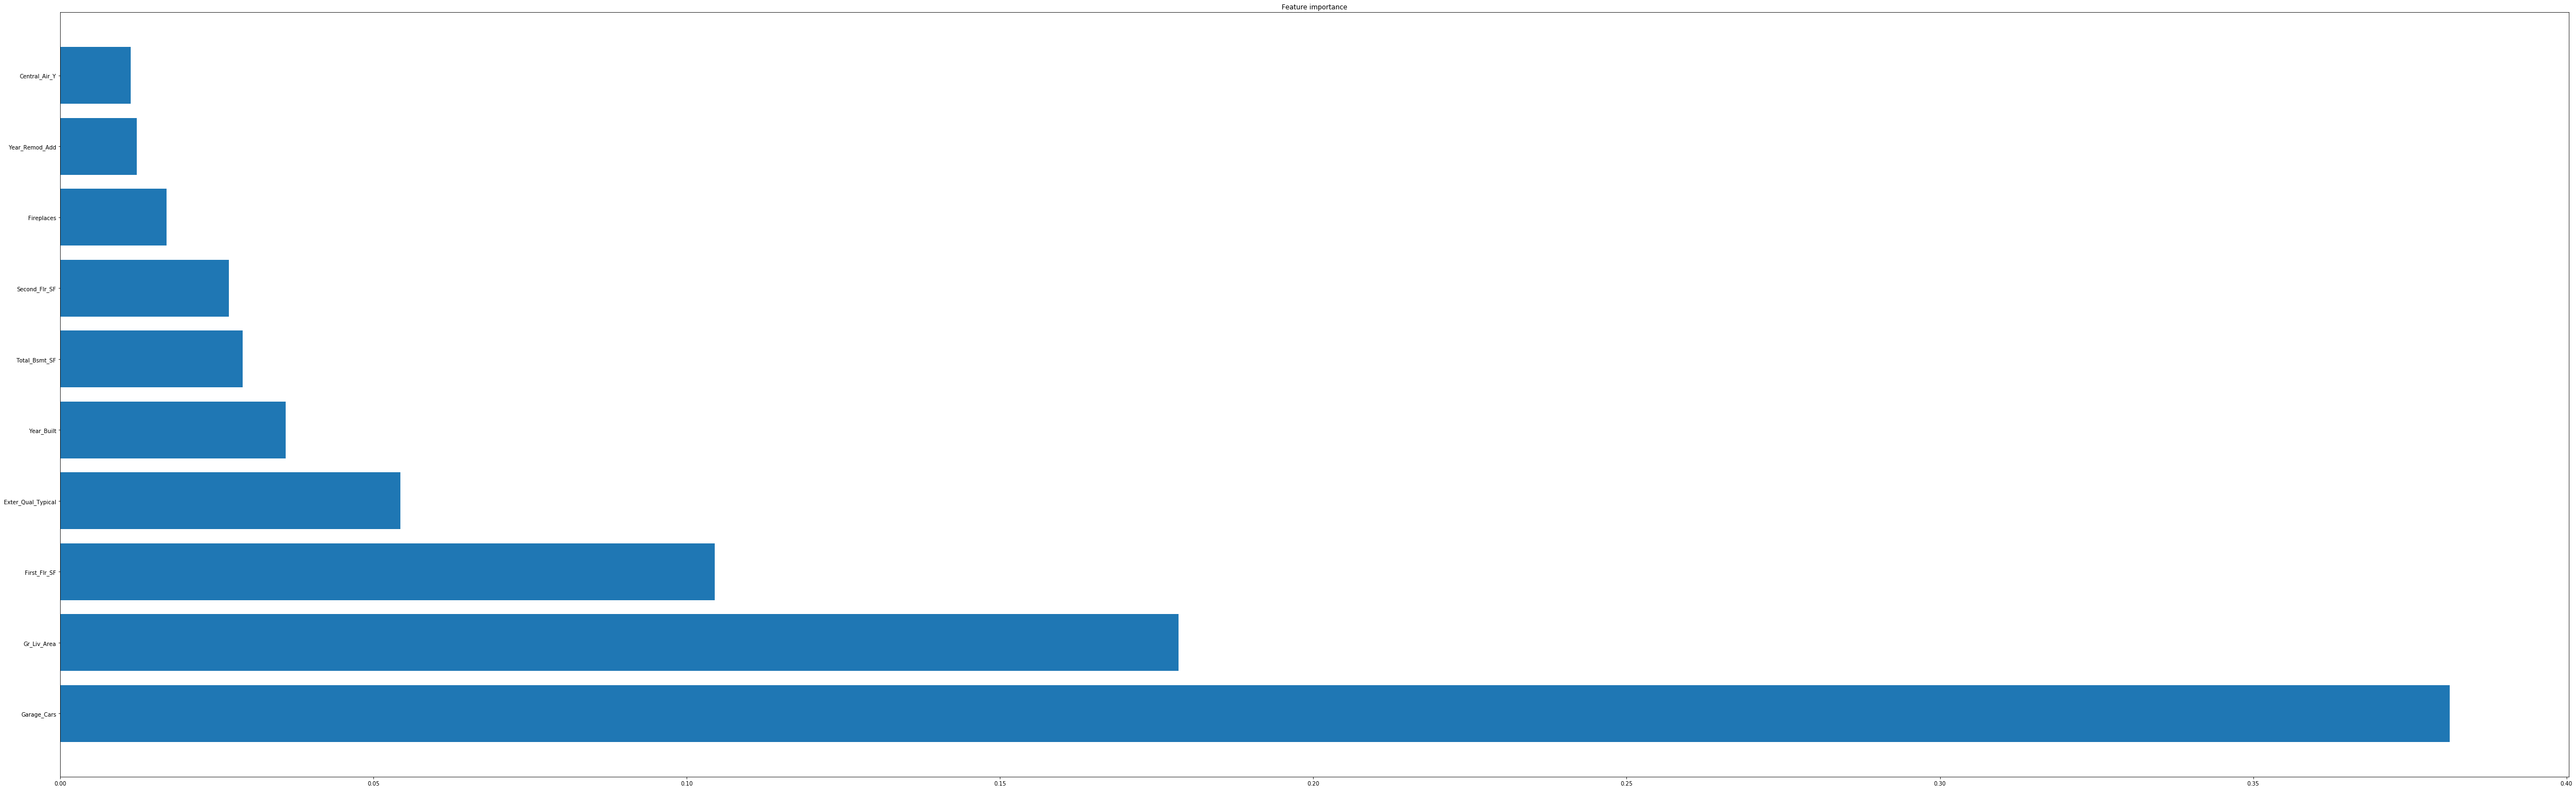

In [12]:
plt.figure(figsize = (65, 20))
from_lecture.plot_importance(dtr_base, X.columns, 10)
plt.tight_layout()

Ahora veamos:

In [13]:
tmp_importance = dtr_base.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1]
names = [X.columns[i] for i in sort_importance]

Así, los 10 atributos con mayor relevancia en la predicción de `Sale_Price` están dados por

In [14]:
names[:10]

['Garage_Cars',
 'Gr_Liv_Area',
 'First_Flr_SF',
 'Exter_Qual_Typical',
 'Year_Built',
 'Total_Bsmt_SF',
 'Second_Flr_SF',
 'Fireplaces',
 'Year_Remod_Add',
 'Central_Air_Y']

In [15]:
df_att = df_dummy[names[:10]]
df_obj = df['Sale_Price']
df_best = pd.concat([df_obj, df_att], axis=1)
df_best

Sale_Price  Garage_Cars  Gr_Liv_Area  First_Flr_SF  Exter_Qual_Typical  \
0         215000            2         1656          1656                   1   
1         105000            1          896           896                   1   
2         172000            1         1329          1329                   1   
3         244000            2         2110          2110                   0   
4         189900            2         1629           928                   1   
...          ...          ...          ...           ...                 ...   
2925      142500            2         1003          1003                   1   
2926      131000            2          902           902                   1   
2927      132000            0          970           970                   1   
2928      170000            2         1389          1389                   1   
2929      188000            3         2000           996                   1   

      Year_Built  Total_Bsmt_SF  Second_Flr_SF  Fireplaces  Year_Remod_Add  \
0           1960           1080              0           2            1960   
1           1961            882              0           0            1961   
2           1958           1329              0           0            1958   
3           1968           2110              0           2            1968   
4           1997            928            701           1            1998   
...          ...            ...            ...         ...             ...   
2925        1984           1003              0           0            1984   
2926        1983            864              0           0            1983   
2927        1992            912              0           0            1992   
2928        1974           1389              0           1            1975   
2929        1993            996           1004           1            1994   

      Central_Air_Y  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
2925              1  
2926              1  
2927              1  
2928              1  
2929              1  

[2930 rows x 11 columns]

### **Ejercicio 5: Refactorización del modelo y _pickling_**

In [16]:
X2 = df_best.drop([obj], axis=1)
y2= df_best[obj]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.33, random_state=42)

In [17]:
CV = 5
VERBOSITY = 1
PARAM_GRID = {
    'max_depth': np.linspace(1, 32, 32),  # [1, 2, 3, ... , 31, 32]
    'max_features': list(range(1, X2_train.shape[1]))  # [1, 2, ... , NUMBER_OF_ATTRIBUTES]
}

In [18]:
dtr_gs = GridSearchCV(DecisionTreeRegressor(), param_grid=PARAM_GRID, cv=CV, verbose=VERBOSITY).fit(X2_train, y2_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:    8.4s finished


La mejor combinación de hiperparámetros y su desempeño asociado está dado por:

In [19]:
dtr_gs.best_params_

{'max_depth': 8.0, 'max_features': 5}

In [20]:
dtr_gs.best_score_

0.7845576168986386

**(R)** Comparación del desempeño en la muestra de validación con el modelo por defecto:

In [21]:
dict_base = {
    'mse': mean_squared_error(y_test, y_pred).round(2),
    'mae': median_absolute_error(y_test, y_pred).round(2),
    'r2': r2_score(y_test, y_pred).round(2)
}

In [22]:
y2_pred = dtr_gs.predict(X2_test)
dict_best = {
    'mse': mean_squared_error(y2_test, y2_pred).round(2),
    'mae': median_absolute_error(y2_test, y2_pred).round(2),
    'r2': r2_score(y2_test, y2_pred).round(2)
}

In [23]:
d1 = pd.DataFrame.from_dict(dict_base, orient='index', columns=['base'])
d2 = pd.DataFrame.from_dict(dict_best, orient='index', columns=['best'])
pd.concat([d1, d2], axis=1)

base          best
mse  1.664715e+09  1.202863e+09
mae  1.650000e+04  1.499750e+04
r2   7.500000e-01  8.200000e-01

Y sobre el _pickling_:

In [24]:
pickle.dump(dtr_gs, open('gus-morales_actividad07_best-model.pkl', 'wb'))
pickle.dump(X2_train, open('gus-morales_actividad07_xtrain.pkl', 'wb'))
pickle.dump(X2_test, open('gus-morales_actividad07_xtest.pkl', 'wb'))
pickle.dump(y2_train, open('gus-morales_actividad07_ytrain.pkl', 'wb'))
pickle.dump(y2_test, open('gus-morales_actividad07_ytest.pkl', 'wb'))